In [24]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

sys.path.append("../stylegan/")
from nn import StyleGANGenerator

#### Config

In [47]:
TRAINING_OUTPUT_DIR = "/exports/lkeb-hpc/csrao/git-personal/stylegan/stylegan/training_output"

#### Initialize stuff

In [26]:
# Load model for inference
model_path = f"{TRAINING_OUTPUT_DIR}/checkpoints/iter_365000.pt"
state_dict = torch.load(model_path)
model = StyleGANGenerator(128, prog_growth=False).to('cuda').eval()
model.load_state_dict(state_dict['net_g_state_dict'])

<All keys matched successfully>

## Sampling

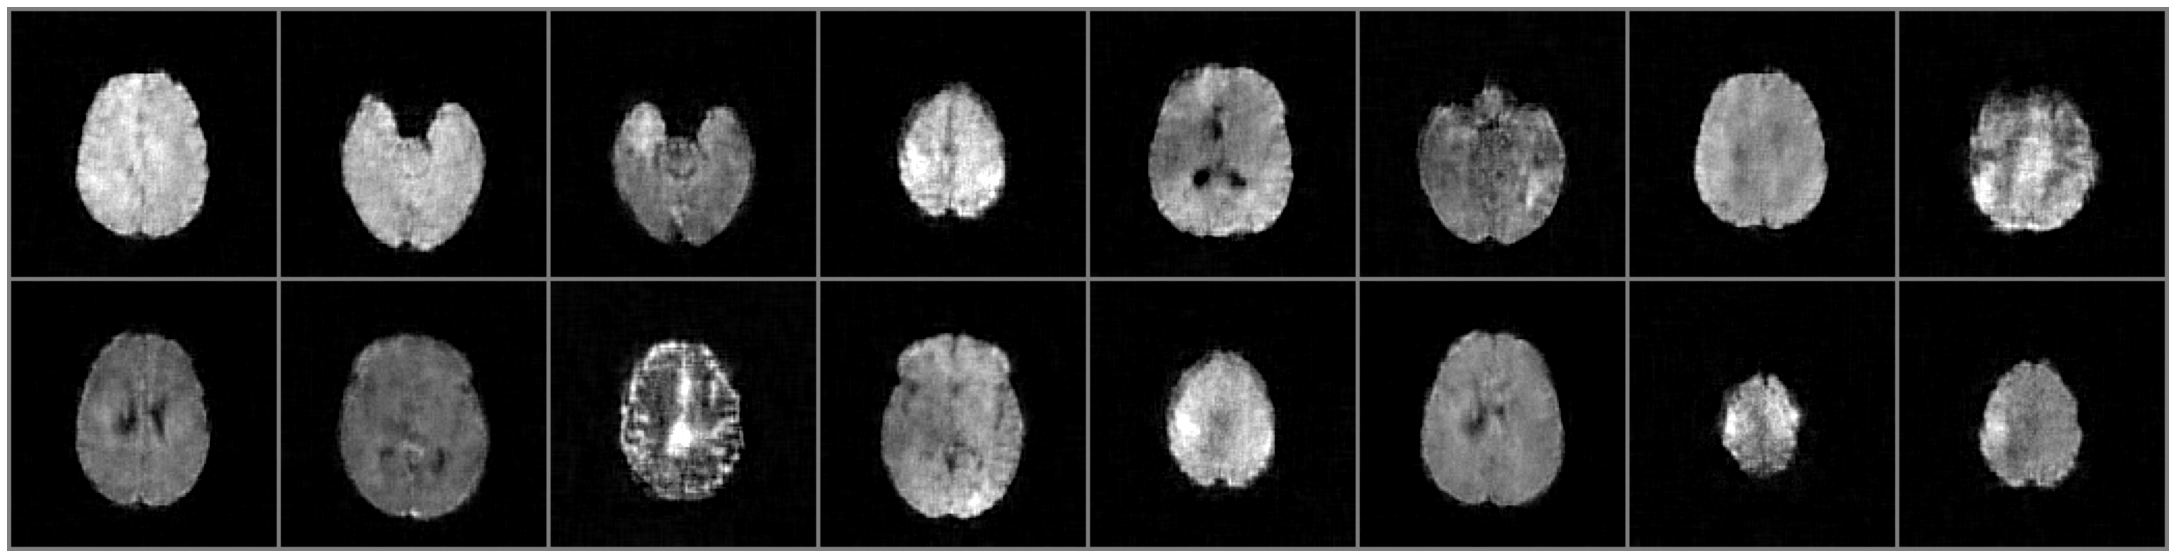

In [46]:
def show_grid(image_batch):
    image_grid = torchvision.utils.make_grid(image_batch, nrows=8, value_range=(-1,1))
    fig, ax = plt.subplots(1, 1, figsize=(5*8, 5*image_batch.shape[0]/8))
    ax.imshow(image_grid[0], vmin=-1, vmax=1, cmap='gray')
    ax.axis('off')
    plt.show()


# Random sample from latent space
num_samples = 16
latent = torch.randn((num_samples, 512), device='cuda')
with torch.no_grad():
    samples = model(latent).cpu()
show_grid(samples)

## Interpolation

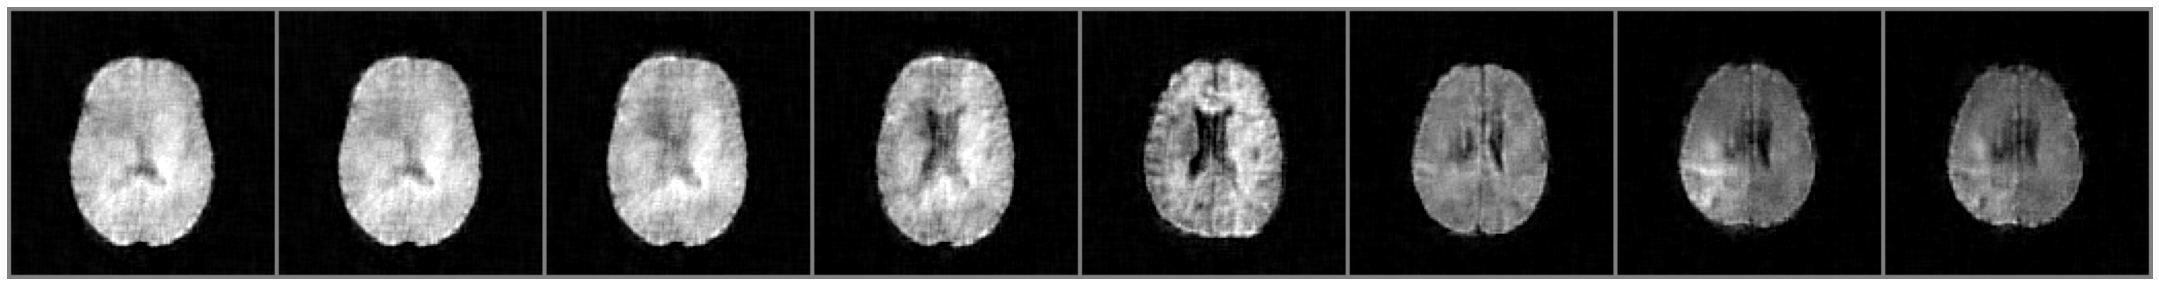

In [77]:
latent_1 = torch.randn((1, 512), device='cuda')
latent_2 = torch.randn((1, 512), device='cuda')

samples = []
for t in np.linspace(0, 1, 8):
    with torch.no_grad():
        latent_t = (1 - t) * latent_1 + t * latent_2
        sample = model(latent_t).cpu()
    samples.append(sample)
samples = torch.cat(samples, dim=0)
show_grid(samples)